Episode (50/1000)
Episode (100/1000)
Episode (150/1000)
Episode (200/1000)
Episode (250/1000)
Episode (300/1000)
Episode (350/1000)
Episode (400/1000)
Episode (450/1000)
Episode (500/1000)
Episode (550/1000)
Episode (600/1000)
Episode (650/1000)
Episode (700/1000)
Episode (750/1000)
Episode (800/1000)
Episode (850/1000)
Episode (900/1000)
Episode (950/1000)
Episode (1000/1000)


Text(0.5, 1.0, 'e-Greedy Optimal Selected Actions')

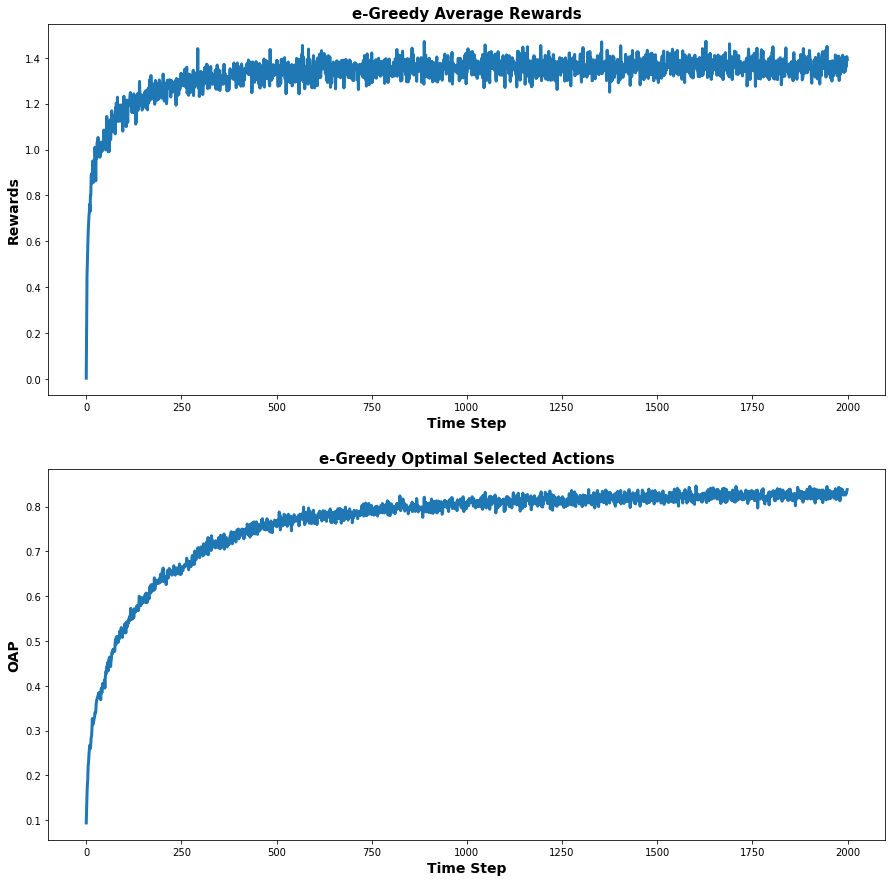

In [24]:
import numpy as np
import matplotlib.pyplot as plt


k = 10

episodes_num = 1000
T = 2000
selected_actions = np.zeros((episodes_num, T), dtype=np.int64)
received_rewards = np.zeros((episodes_num, T))
optimal_actions = np.zeros(episodes_num)
optimal_action_percent = np.zeros((episodes_num, T))

epsilon = 0.1


for episode in range(episodes_num):
    qs = np.random.randn(k)
    optimal_actions[episode] = np.argmax(qs)
    
    Q = np.zeros(k)
    actions_counters = np.zeros(k)
    
    for t in range(T):
        selected_actions[episode, t] = np.random.choice(np.where(Q == Q.max())[0]) if np.random.rand() > epsilon else np.random.randint(low=0, high=k)
        received_rewards[episode, t] = qs[selected_actions[episode, t]] + np.random.randn()
        actions_counters[selected_actions[episode, t]] += 1

        Q[selected_actions[episode, t]] += (received_rewards[episode, t] - Q[selected_actions[episode, t]]) / actions_counters[selected_actions[episode, t]]
    
    if (episode+1) % 50 == 0:
        print(f'Episode ({episode+1}/{episodes_num})')

for episode in range(episodes_num):
    optimal_action_percent[episode] = selected_actions[episode] == optimal_actions[episode]
    
reward_average = received_rewards.mean(axis=0)
optimal_action_percent = optimal_action_percent.mean(axis=0)


fig, axs = plt.subplots(2, 1, figsize=(15, 15))
axs[0].plot(reward_average, linewidth=3)
axs[0].set_xlabel('Time Step', fontsize=14, fontweight='bold')
axs[0].set_ylabel('Rewards', fontsize=14, fontweight='bold')
axs[0].set_title('e-Greedy Average Rewards', fontsize=15, fontweight='bold')

axs[1].plot(optimal_action_percent, linewidth=3)
axs[1].set_xlabel('Time Step', fontsize=14, fontweight='bold')
axs[1].set_ylabel('OAP', fontsize=14, fontweight='bold')
axs[1].set_title('e-Greedy Optimal Selected Actions', fontsize=15, fontweight='bold')